# SLINK result analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Read file with time results

In [2]:
dataset = pd.read_csv("time_results.csv", header=None)

In [3]:
dataset

,0,1,2,3,4
0,naive,0.000617,dissimilarity_matrix_build_time,50,2
1,naive,0.000207,linkage_matrix_build_time,50,2
2,naive,0.000824,total_time,50,2
3,slink,0.000403,pointer_representation_build_time,50,2
4,slink,0.000023,linkage_matrix_build_time,50,2
5,slink,0.000426,total_time,50,2
6,naive_optimized,0.000367,dissimilarity_matrix_build_time,50,2
7,naive_optimized,0.000362,linkage_matrix_build_time,50,2
8,naive_optimized,0.000729,total_time,50,2
9,naive,0.000342,dissimilarity_matrix_build_time,50,5


In [4]:
file = open("test_config", "r") 
line1 = file.readline()
n_list = list(map(int, line1.split('\n')[0].split("=")[1].split(",")))
line2 = file.readline()
dim_list = list(map(int, line2.split('\n')[0].split("=")[1].split(",")))

Let's see the number of samples that the algorithms have been tested with:

In [5]:
X = n_list
X

[50, 100, 200, 500, 1000, 2000, 3000]

... and the data dimensionality:

In [6]:
dim_list

[2, 5, 10, 50, 200]

Let's see where the algorithms spend their time on

In [7]:
slink = dataset.loc[dataset[0] == "slink"]
naive = dataset.loc[dataset[0] == "naive"]
naive_opt = dataset.loc[dataset[0] == "naive_optimized"]

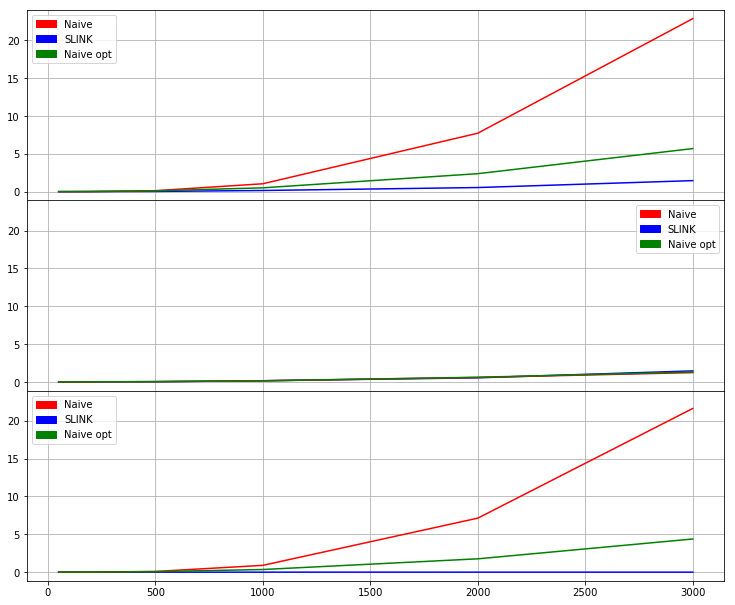

In [8]:
dim = 2
times = [["total_time", "total_time", "total_time"],
        ["pointer_representation_build_time", "dissimilarity_matrix_build_time", "dissimilarity_matrix_build_time"],
        ["linkage_matrix_build_time", "linkage_matrix_build_time", "linkage_matrix_build_time"]]

f, axis = plt.subplots(len(times), sharex=True, sharey=True)
for index, t in enumerate(times):
    ax = axis[index]
    ax.plot(X, slink.loc[(slink[2] == t[0]) & (slink[4] == dim)][1], "b")
    ax.plot(X, naive.loc[(naive[2] == t[1]) & (naive[4] == dim)][1], "r")
    ax.plot(X, naive_opt.loc[(naive_opt[2] == t[2]) & (naive_opt[4] == dim)][1], "g")
    #ax.ylabel('running time [sec]')
    #ax.xlabel('number of points')
    red_patch = mpatches.Patch(color='red', label='Naive')
    blue_patch = mpatches.Patch(color='blue', label='SLINK')
    green_patch = mpatches.Patch(color='green', label='Naive opt')
    ax.legend(handles=[red_patch, blue_patch, green_patch])
    ax.grid()
    #ax.title("running time for dim=2")
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
f.set_size_inches(12.5, 10.5)
plt.show()

- SLINK spends almost all its time building the pointer representation, then it converts it to the linkage matrix in very little time.<br>
- Naive spends a bit of time building the dissimilarity matrix and then spends most of its time building the linkage matrix.<br>
- Naive_optimized is similar to naive but it spends less time building the linkage matrix.

## Effect of data dimensionality over running time

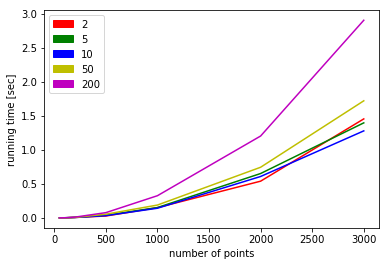

In [9]:
colors = ["r", "g", "b", "y", "m"]

plt.ylabel('running time [sec]')
plt.xlabel('number of points')
patches = []

for t in zip(dim_list, colors):
    plt.plot(X, slink.loc[(slink[2] == "total_time") & (slink[4] == t[0])][1], t[1])
    patch = mpatches.Patch(color=t[1], label=t[0])
    patches.append(patch)

plt.legend(handles=patches)
plt.show()

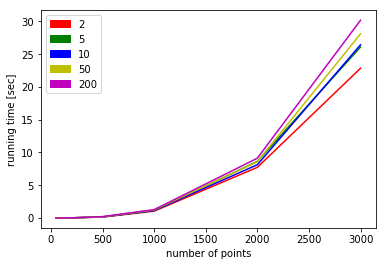

In [10]:
plt.ylabel('running time [sec]')
plt.xlabel('number of points')
patches = []

for t in zip(dim_list, colors):
    plt.plot(X, naive.loc[(naive[2] == "total_time") & (naive[4] == t[0])][1], t[1])
    patch = mpatches.Patch(color=t[1], label=t[0])
    patches.append(patch)
    
plt.legend(handles=patches)
plt.show()

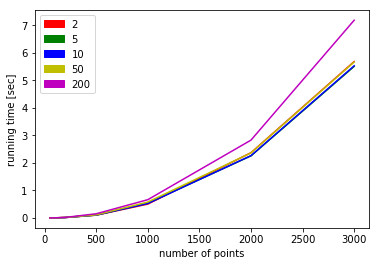

In [11]:
plt.ylabel('running time [sec]')
plt.xlabel('number of points')
patches = []

for t in zip(dim_list, colors):
    plt.plot(X, naive_opt.loc[(naive_opt[2] == "total_time") & (naive_opt[4] == t[0])][1], t[1])
    patch = mpatches.Patch(color=t[1], label=t[0])
    patches.append(patch)
    
plt.legend(handles=patches)
plt.show()

### Relative increment in time between 2 and 200 dimensions

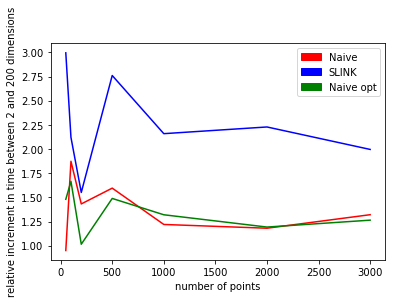

In [29]:
plt.ylabel('relative increment in time between 2 and 200 dimensions')
plt.xlabel('number of points')

times_200_slink = (slink.loc[(slink[2] == "total_time") & (slink[4] == 200)][1]).values
times_2_slink = (slink.loc[(slink[2] == "total_time") & (slink[4] == 2)][1]).values
times_200_naive = (naive.loc[(naive[2] == "total_time") & (naive[4] == 200)][1]).values
times_2_naive = (naive.loc[(naive[2] == "total_time") & (naive[4] == 2)][1]).values
times_200_naive_opt = (naive_opt.loc[(naive_opt[2] == "total_time") & (naive_opt[4] == 200)][1]).values
times_2_naive_opt = (naive_opt.loc[(naive_opt[2] == "total_time") & (naive_opt[4] == 2)][1]).values

plt.plot(X, times_200_slink / times_2_slink, "b")
plt.plot(X, times_200_naive / times_2_naive, "r")
plt.plot(X, times_200_naive_opt / times_2_naive_opt, "g")
red_patch = mpatches.Patch(color='red', label='Naive')
blue_patch = mpatches.Patch(color='blue', label='SLINK')
green_patch = mpatches.Patch(color='green', label='Naive opt')
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.show()

### Relative increment in time between 2 and 200 dimensions

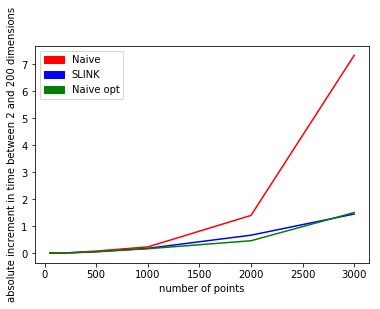

In [30]:
plt.ylabel('absolute increment in time between 2 and 200 dimensions')
plt.xlabel('number of points')

times_200_slink = (slink.loc[(slink[2] == "total_time") & (slink[4] == 200)][1]).values
times_2_slink = (slink.loc[(slink[2] == "total_time") & (slink[4] == 2)][1]).values
times_200_naive = (naive.loc[(naive[2] == "total_time") & (naive[4] == 200)][1]).values
times_2_naive = (naive.loc[(naive[2] == "total_time") & (naive[4] == 2)][1]).values
times_200_naive_opt = (naive_opt.loc[(naive_opt[2] == "total_time") & (naive_opt[4] == 200)][1]).values
times_2_naive_opt = (naive_opt.loc[(naive_opt[2] == "total_time") & (naive_opt[4] == 2)][1]).values

plt.plot(X, times_200_slink - times_2_slink, "b")
plt.plot(X, times_200_naive - times_2_naive, "r")
plt.plot(X, times_200_naive_opt - times_2_naive_opt, "g")
red_patch = mpatches.Patch(color='red', label='Naive')
blue_patch = mpatches.Patch(color='blue', label='SLINK')
green_patch = mpatches.Patch(color='green', label='Naive opt')
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.show()